In [1]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('image.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocess the image (e.g., denoising, contrast enhancement)
# You may apply additional preprocessing techniques depending on the specific image characteristics

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform adaptive histogram equalization to enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(blurred)

# Threshold the image to segment nuclei from the background
_, thresholded = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations to clean up the image
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Apply edge detection to highlight the edges of nuclei
edges = cv2.Canny(sure_bg, 30, 100)

# Convert edges to 3 channels to match the original image
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Overlay the detected edges on the original image
highlighted_image = cv2.addWeighted(image, 0.7, edges_rgb, 0.3, 0)

In [2]:
import matplotlib.pyplot as plt

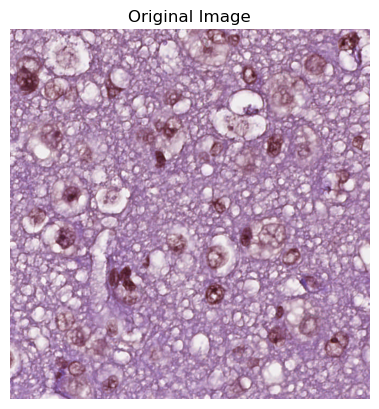

In [3]:
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

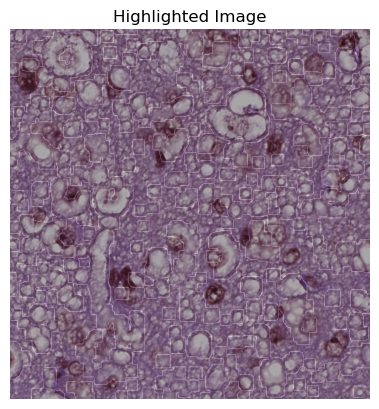

In [4]:
plt.title('Highlighted Image')
plt.imshow(highlighted_image)
plt.axis('off')
plt.show()

In [5]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('image.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform contrast enhancement to highlight the stained regions
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

# Apply thresholding to obtain a binary image
_, thresholded = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Perform morphological operations to clean up the binary image
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=2)

# Perform distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convert sure foreground to uint8
sure_fg = np.uint8(sure_fg)

# Perform watershed segmentation
markers = cv2.connectedComponents(sure_fg)[1]
markers = markers + 1
markers[opening == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]  # Draw boundaries

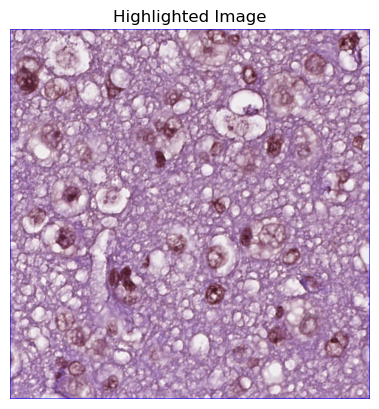

In [6]:
plt.title('Highlighted Image')
plt.imshow(image)
plt.axis('off')
plt.show()